In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [45]:
mpg = pd.read_csv('car-mpg.csv')
mpg.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [46]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [47]:
mpg.drop('car_name',axis=1,inplace=True)
mpg.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [48]:
mpg['origin'] = mpg['origin'].replace({1:'america',2:'europe',3:'asia'})
mpg = pd.get_dummies(mpg, columns=['origin'],drop_first=True)
mpg.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


In [49]:
mpg.replace('?',np.nan,inplace=True)

In [50]:
mpg.isnull().sum()

mpg              0
cyl              0
disp             0
hp               6
wt               0
acc              0
yr               0
origin_asia      0
origin_europe    0
dtype: int64

In [52]:
mpg = mpg.apply(lambda x:x.fillna(x.median()),axis=0)
mpg['hp'] = mpg['hp'].astype(int)
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg              398 non-null float64
cyl              398 non-null int64
disp             398 non-null float64
hp               398 non-null int32
wt               398 non-null int64
acc              398 non-null float64
yr               398 non-null int64
origin_asia      398 non-null int64
origin_europe    398 non-null int64
dtypes: float64(3), int32(1), int64(5)
memory usage: 26.5 KB


In [53]:
X = mpg.drop('mpg',axis=1)
y = mpg['mpg']

In [64]:
from sklearn import preprocessing

X_scaled = DataFrame(preprocessing.scale(X), columns=X.columns)
X_scaled.head()

C:\Users\mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


,cyl,disp,hp,wt,acc,yr,origin_asia,origin_europe
0,1.498191,1.090604,0.673277,0.630870,-1.295498,-1.627426,-0.497643,-0.461968
1,1.498191,1.503514,1.590065,0.854333,-1.477038,-1.627426,-0.497643,-0.461968
2,1.498191,1.196232,1.197156,0.550470,-1.658577,-1.627426,-0.497643,-0.461968
3,1.498191,1.061796,1.197156,0.546923,-1.295498,-1.627426,-0.497643,-0.461968
4,1.498191,1.042591,0.935216,0.565841,-1.840117,-1.627426,-0.497643,-0.461968


In [91]:
X.describe()

,cyl,disp,hp,wt,acc,yr,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,0.198492,0.175879
std,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,0.399367,0.381197
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000
50%,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,0.000000,0.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000


In [65]:
X_scaled.describe()

,cyl,disp,hp,wt,acc,yr,origin_asia,origin_europe
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,2.482660e-16,-9.902743e-17,8.982206e-17,-8.837152e-16,-5.219164e-16,-7.057448e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.527015e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-4.976433e-01,-4.619682e-01
25%,-8.563206e-01,-8.563178e-01,-7.411966e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-4.976433e-01,-4.619682e-01
50%,-8.563206e-01,-4.314040e-01,-2.958995e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-4.976433e-01,-4.619682e-01
75%,1.498191e+00,6.584879e-01,5.423069e-01,7.538337e-01,5.834349e-01,8.096310e-01,-4.976433e-01,-4.619682e-01
max,1.498191e+00,2.511784e+00,3.292671e+00,2.565185e+00,3.351912e+00,1.621983e+00,2.009471e+00,2.164651e+00


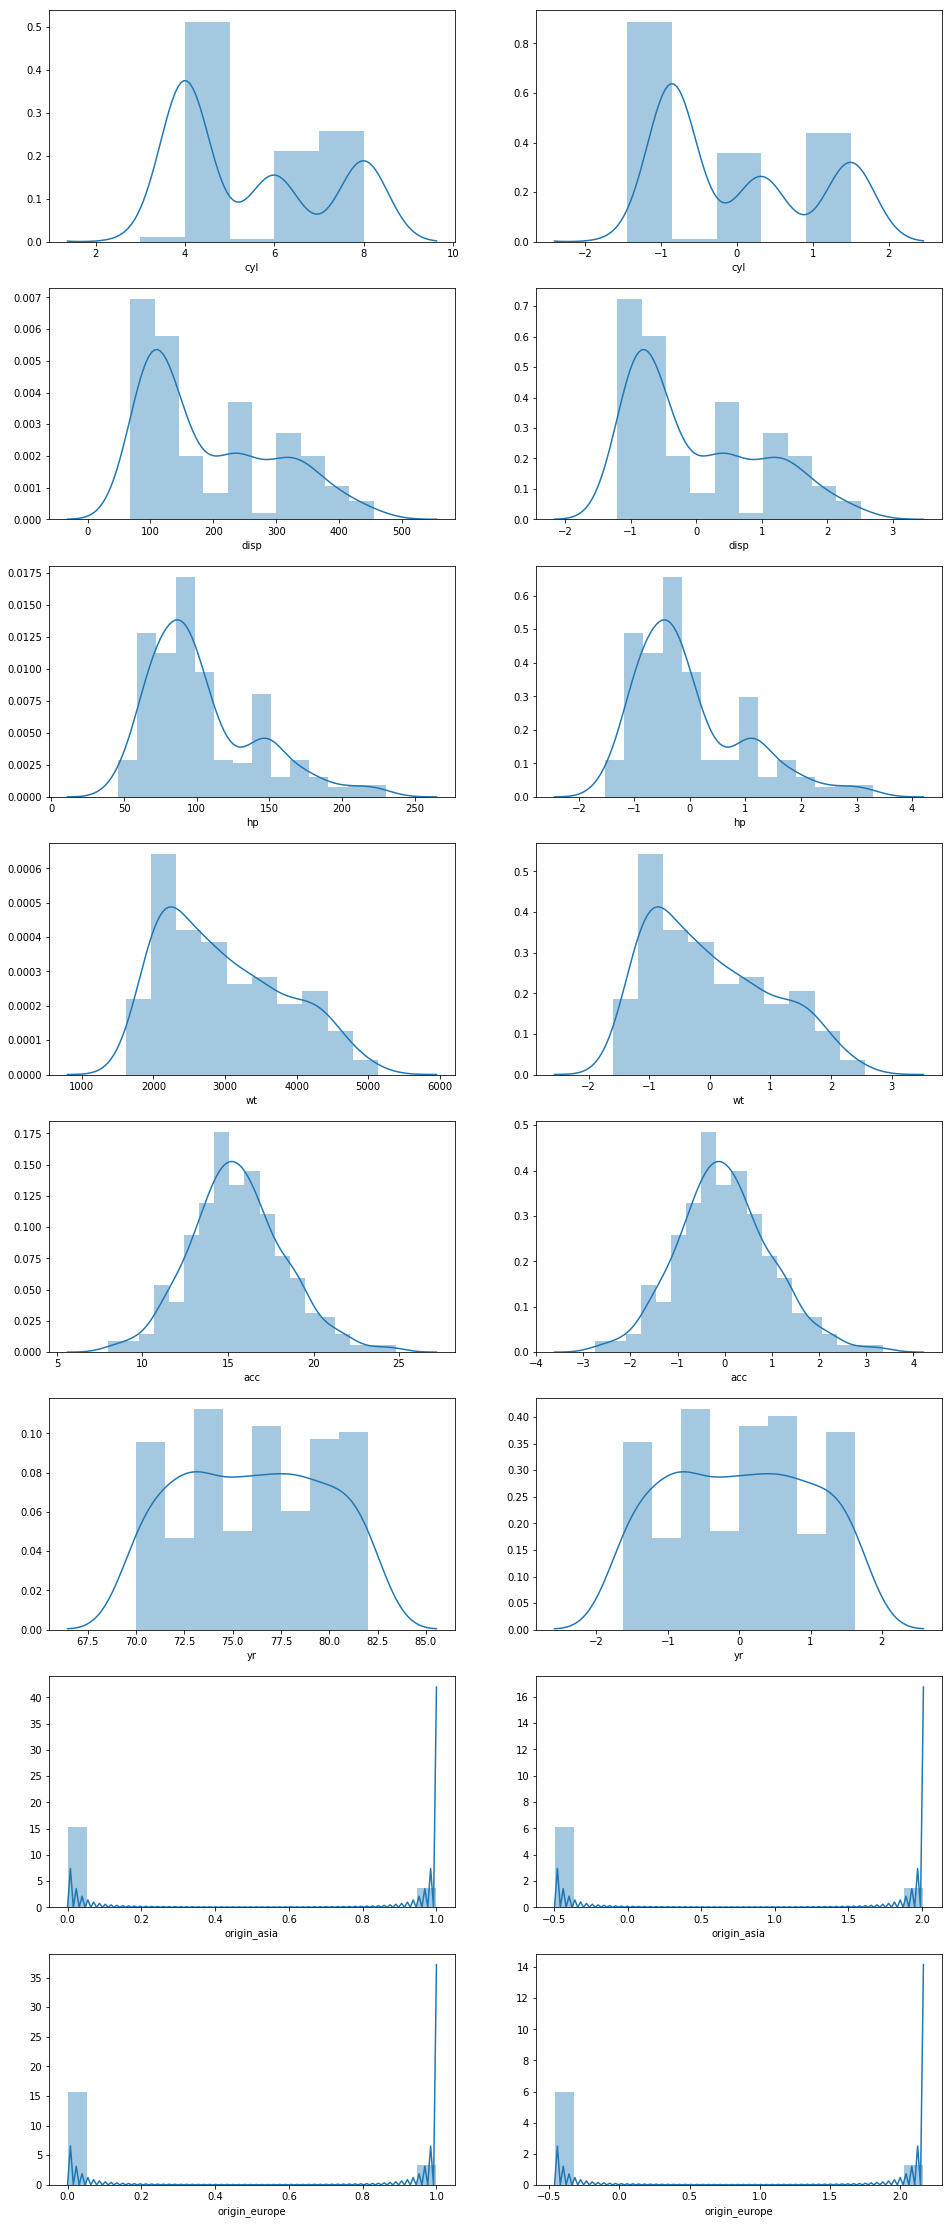

In [72]:
fig,ax = plt.subplots(8,2,figsize=(16,40))

i=0
for col in X.columns:
    sns.distplot(X[col],ax=ax[i,0])
    sns.distplot(X_scaled[col],ax=ax[i,1])
    i = i+1

plt.show()

In [73]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,y,test_size=0.3, random_state=1)

In [80]:
regmodel = LinearRegression()
regmodel.fit(xtrain,ytrain)
print('Intercept =',regmodel.intercept_)
print('Coefficients =',regmodel.coef_)

Intercept = 23.63562623055674
Coefficients = [-0.67062718  3.0146471  -0.8312663  -6.21771627  0.17022085  3.09069785
  0.95567182  1.14280577]


In [81]:
ridge = Ridge(alpha=15)
ridge.fit(xtrain,ytrain)
print('Intercept =',ridge.intercept_)
print('Coefficients =',ridge.coef_)

Intercept = 23.62304254124963
Coefficients = [-0.29569074  0.23478287 -1.22797844 -3.86224178 -0.20835607  2.74522039
  0.79972072  0.83833961]


In [83]:
lasso = Lasso(alpha=0.1)
lasso.fit(xtrain,ytrain)
print('Intercept =',lasso.intercept_)
print('Coefficients =',lasso.coef_)

Intercept = 23.622961518586983
Coefficients = [ 0.          0.         -0.30427759 -4.8662756   0.          2.85082872
  0.51858525  0.6452251 ]


In [87]:
print('---Linear Regression---')
print('Training Accuracy',regmodel.score(xtrain,ytrain))
print('Test Accuracy',regmodel.score(xtest,ytest))

Linear Regression:
Training Accuracy 0.8141028479576387
Test Accuracy 0.8433220109385648


In [88]:
print('---Ridge---')
print('Training Accuracy',ridge.score(xtrain,ytrain))
print('Test Accuracy',ridge.score(xtest,ytest))

Ridge:
Training Accuracy 0.8048543257847739
Test Accuracy 0.8434613466976899


In [90]:
print('---Lasso---')
print('Training Accuracy',lasso.score(xtrain,ytrain))
print('Test Accuracy',lasso.score(xtest,ytest))

---Lasso---
Training Accuracy 0.80644690505119
Test Accuracy 0.8447746842548144


In [93]:
X_scaled.describe()

,cyl,disp,hp,wt,acc,yr,origin_asia,origin_europe
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,2.482660e-16,-9.902743e-17,8.982206e-17,-8.837152e-16,-5.219164e-16,-7.057448e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.527015e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-4.976433e-01,-4.619682e-01
25%,-8.563206e-01,-8.563178e-01,-7.411966e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-4.976433e-01,-4.619682e-01
50%,-8.563206e-01,-4.314040e-01,-2.958995e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-4.976433e-01,-4.619682e-01
75%,1.498191e+00,6.584879e-01,5.423069e-01,7.538337e-01,5.834349e-01,8.096310e-01,-4.976433e-01,-4.619682e-01
max,1.498191e+00,2.511784e+00,3.292671e+00,2.565185e+00,3.351912e+00,1.621983e+00,2.009471e+00,2.164651e+00


In [94]:
X_scaled['cyl'].std()

1.001258653739213